In [185]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date
import file

In [186]:
# Define the ticker symbol
tickerSymbol = 'USD'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
history = tickerData.history(interval='1wk', start='2023-1-1', end=date.today())
display(history)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-01-01 00:00:00-05:00,17.051472,17.911043,15.932032,17.701147,431300,0.0,0.0,0.0
2023-01-08 00:00:00-05:00,18.360818,19.950021,17.981007,19.930033,703900,0.0,0.0,0.0
2023-01-15 00:00:00-05:00,19.850074,20.789603,18.560718,19.910044,460600,0.0,0.0,0.0
2023-01-22 00:00:00-05:00,20.289852,22.748623,20.149922,22.428783,1011700,0.0,0.0,0.0
2023-01-29 00:00:00-05:00,21.719138,25.737129,20.939529,24.367813,756200,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-09-15 00:00:00-04:00,109.559998,117.050003,105.449997,111.750000,2448800,0.0,0.0,0.0
2024-09-22 00:00:00-04:00,112.279999,130.100006,110.120003,120.589996,2016300,0.0,0.0,0.0
2024-09-29 00:00:00-04:00,116.279999,124.559998,110.050003,124.070000,1736300,0.0,0.0,0.0


In [187]:
max_weeks = 52

In [188]:

gap = (1/100)*100

option_prices = {
    1: [94/1.95],
    2: [90/4.05, 92/7.30],
    3: [91/5.15],
    4: [81/5.4, 74/5.1, 131/12.1],
    5: [100/7.05, 126/12.05],
    6: [94/7.4, 92/11.30],
    7: [90/8.25],
    8: [91/8.05, 131/16.05],
    9: [81/8.45, 100/9.4, 126/15.6],
    10: [93/13.95],
    12: [131/19.6],
    13: [100/11.5, 126/19.2],
    14: [94/10.55],
    15: [90/11.15],
    16: [91/12.75],
    17: [81/11.3, 74/10.4],
    24: [93/19.50],
    26: [100/18.55, 131/27.85],
    27: [94/17.25, 126/26.35],
    28: [90/16.9],
    29: [91/17.55],
    30: [81/14.95]
}

polygon_data = {
    1: 39.78571428571429,
    2: 26.896551724137932,
    3: 19.767441860465116,
    4: 18.01948051948052,
    5: 15.074595055413472,
    6: 13.310023310023311,
    7: 11.9, #13.772609819121445,
    8: 10.511111111111111,
}
for k, v in polygon_data.items():
    if not k in option_prices:
        option_prices[k] = []
    option_prices[k].append(v)

print('option leverages:')
for w in sorted(option_prices.keys()):
    print(f'\t{w:2}w', *[f'{x:4.1f}' for x in option_prices[w]])

option_leverage = {w:mean(option_prices[w]) for w in option_prices}
print('mean option leverage, break even:')
for w in sorted(option_leverage.keys()):
    print(f'\t{w:2}w {option_leverage[w]:4.1f} {gap + 100/option_leverage[w]:4.1f}%')
print(f'option gap: {gap:.2f}%')

file.save_option_leverage(tickerSymbol, option_leverage)

option leverages:
	 1w 48.2 39.8
	 2w 22.2 12.6 26.9
	 3w 17.7 19.8
	 4w 15.0 14.5 10.8 18.0
	 5w 14.2 10.5 15.1
	 6w 12.7  8.1 13.3
	 7w 10.9 11.9
	 8w 11.3  8.2 10.5
	 9w  9.6 10.6  8.1
	10w  6.7
	12w  6.7
	13w  8.7  6.6
	14w  8.9
	15w  8.1
	16w  7.1
	17w  7.2  7.1
	24w  4.8
	26w  5.4  4.7
	27w  5.4  4.8
	28w  5.3
	29w  5.2
	30w  5.4
mean option leverage, break even:
	 1w 44.0  3.3%
	 2w 20.6  5.9%
	 3w 18.7  6.3%
	 4w 14.6  7.9%
	 5w 13.2  8.6%
	 6w 11.4  9.8%
	 7w 11.4  9.8%
	 8w 10.0 11.0%
	 9w  9.4 11.6%
	10w  6.7 16.0%
	12w  6.7 16.0%
	13w  7.6 14.1%
	14w  8.9 12.2%
	15w  8.1 13.4%
	16w  7.1 15.0%
	17w  7.1 15.0%
	24w  4.8 22.0%
	26w  5.0 20.8%
	27w  5.1 20.5%
	28w  5.3 19.8%
	29w  5.2 20.3%
	30w  5.4 19.5%
option gap: 1.00%


In [189]:
stock_change = [None]
option_performance = []
for weeks in range(1, max_weeks+1):
    stock_changes = history['Close'].pct_change(periods=weeks) * 100
    stock_change.append(stock_changes.median())
    window_max = history['High'].rolling(window=pd.api.indexers.FixedForwardWindowIndexer(window_size=weeks)).max()

    if weeks in option_leverage:
        lvr = option_leverage[weeks]
        option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
        mean_profit = option_profits.mean() #* 52 / weeks # annualized
        median_profit = option_profits.median()
        positive_percent = (option_profits > 0).mean() * 100
        wmax = (((window_max / history['Open'] - 1) * 100 - gap) * lvr - 100).clip(lower=-100).median() - 100
        option_performance.append([weeks, mean_profit, positive_percent, wmax, median_profit])
        # history[f'Option {weeks}w'] = option_profits # * 52 / weeks # annualized

In [190]:
print('Option performance (weeks, profit, positive, w max):')
for p in option_performance:
    weeks = p[0]
    print(f'\t{weeks:2}w {p[1]:4.0f}% {p[2]:3.0f}% {p[3]:4.0f}%')

Option performance (weeks, profit, positive, w max):
	 1w  110%  45%   45%
	 2w   62%  47%    8%
	 3w  101%  51%   91%
	 4w   86%  52%   46%
	 5w  103%  55%   56%
	 6w  106%  58%   47%
	 7w  132%  59%   66%
	 8w  133%  63%   72%
	 9w  144%  62%  111%
	10w   91%  56%   49%
	12w  123%  60%   99%
	13w  175%  67%  196%
	14w  247%  71%  359%
	15w  239%  75%  341%
	16w  223%  76%  303%
	17w  250%  74%  352%
	24w  258%  84%  262%
	26w  315%  93%  330%
	27w  337%  90%  376%
	28w  373%  95%  402%
	29w  380%  95%  395%
	30w  423%  97%  431%


In [191]:
from file import save_file

save_file(tickerSymbol, option_performance)

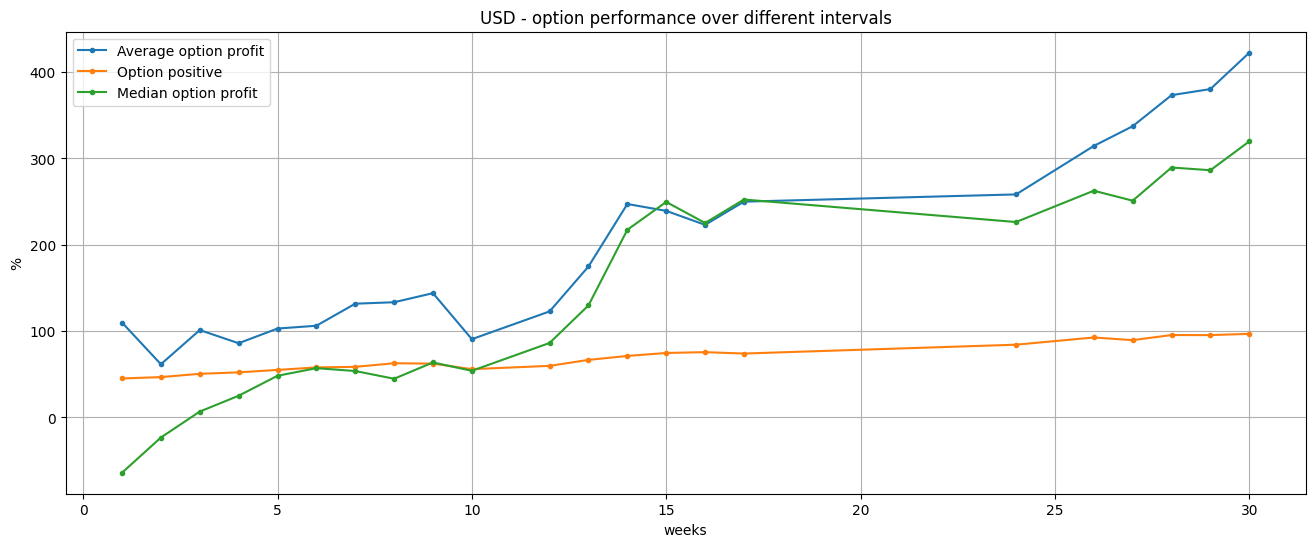

In [192]:
plt.figure(figsize=(16,6))
option_weeks = [p[0] for p in option_performance]
option_profit = [p[1] for p in option_performance]
option_positive = [p[2] for p in option_performance]
option_mprofit = [p[4] for p in option_performance]
option_score = [x * y / 100 for x, y in zip(option_profit, option_positive)]
plt.plot(option_weeks, option_profit, label='Average option profit', marker='.')
plt.plot(option_weeks, option_positive, label='Option positive', marker='.')
# plt.plot(option_weeks, option_score, label='Option score', marker='.')
plt.plot(option_weeks, option_mprofit, label='Median option profit', marker='.')
plt.legend()
plt.title(f'{tickerSymbol} - option performance over different intervals')
plt.xlabel('weeks')
plt.ylabel('%')
plt.grid()
plt.show()

In [193]:
# weeks = 3
# maxprofit = 200
# lvr = option_leverage[weeks]
# history['WClose'] = history.Close.shift(weeks)
# history['WHigh'] = history.High.rolling(window=weeks).max()
# history['w_profit'] = (((history.Close / history.WClose - 1) * 100 - gap) * lvr - 100).clip(lower=-100)
# history['wmax_profit'] = (((history.WHigh / history.WClose - 1) * 100 - gap) * lvr - 100)
# wmax_profit = history.wmax_profit.clip(upper=maxprofit)
# history['profit'] = wmax_profit.where(wmax_profit >= maxprofit, history.w_profit)
# display(history[weeks:])

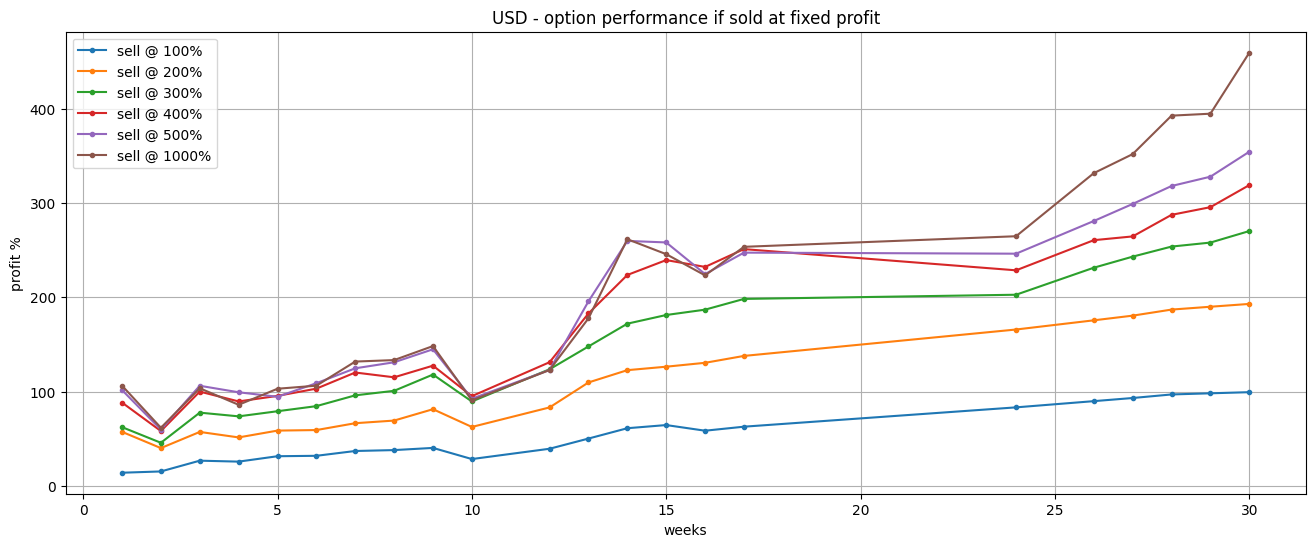

In [198]:
plt.figure(figsize=(16,6))

for maxprofit in [100,200,300,400,500,1000]:
    data = {}
    for weeks in option_leverage:
        lvr = option_leverage[weeks]
        WClose = history.Close.shift(weeks)
        WHigh = history.High.rolling(window=weeks).max()
        w_profit = (((history.Close / WClose - 1) * 100 - gap) * lvr - 100).clip(lower=-100)
        wmax_profit = (((WHigh / WClose - 1) * 100 - gap) * lvr - 100).clip(upper=maxprofit)
        profit = wmax_profit.where(wmax_profit >= maxprofit, w_profit)
        data[weeks] = profit[weeks:].mean()

    plt.plot(*zip(*sorted(data.items())), label=f'sell @ {maxprofit}%', marker='.')

plt.legend(loc='best')
plt.title(f'{tickerSymbol} - option performance if sold at fixed profit')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

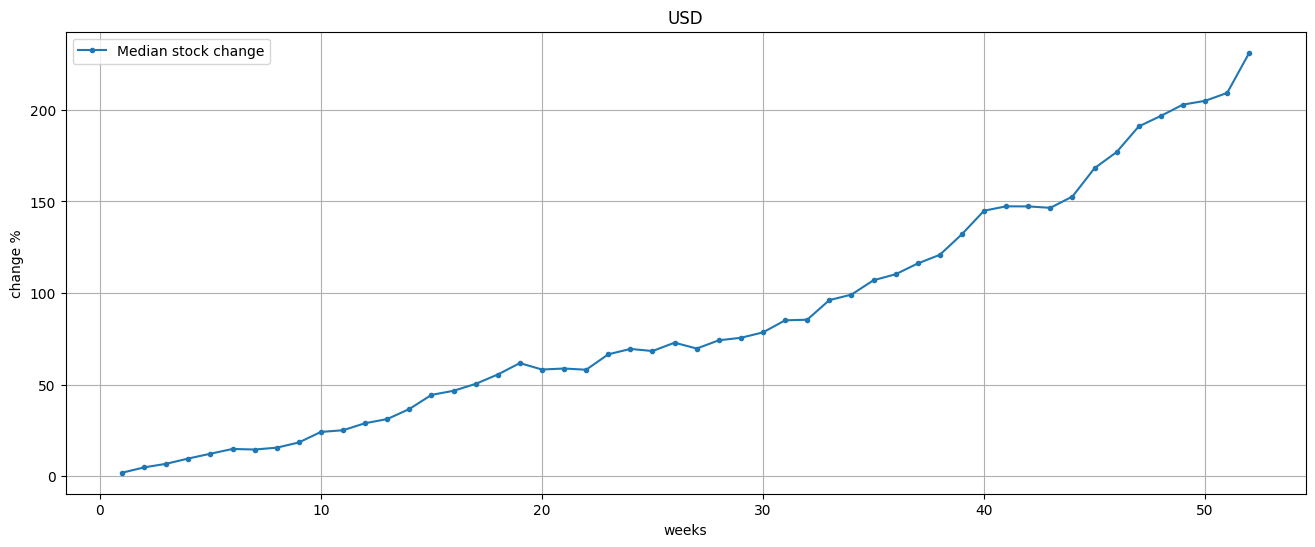

In [195]:
plt.figure(figsize=(16,6))
plt.plot(stock_change, label='Median stock change', marker='.')
plt.legend(loc='best')
plt.title(tickerSymbol)
plt.xlabel('weeks')
plt.ylabel('change %')
plt.grid()
plt.show()


In [196]:
plt.figure(figsize=(16,9))

for w in [1,2,4,8]:
    history[f'Option {w}w'].cumsum().plot()

plt.legend(loc='upper left')
plt.title(f'{tickerSymbol} - option performance')
plt.ylabel('%')
plt.grid()
plt.show()


KeyError: 'Option 1w'

<Figure size 1600x900 with 0 Axes>

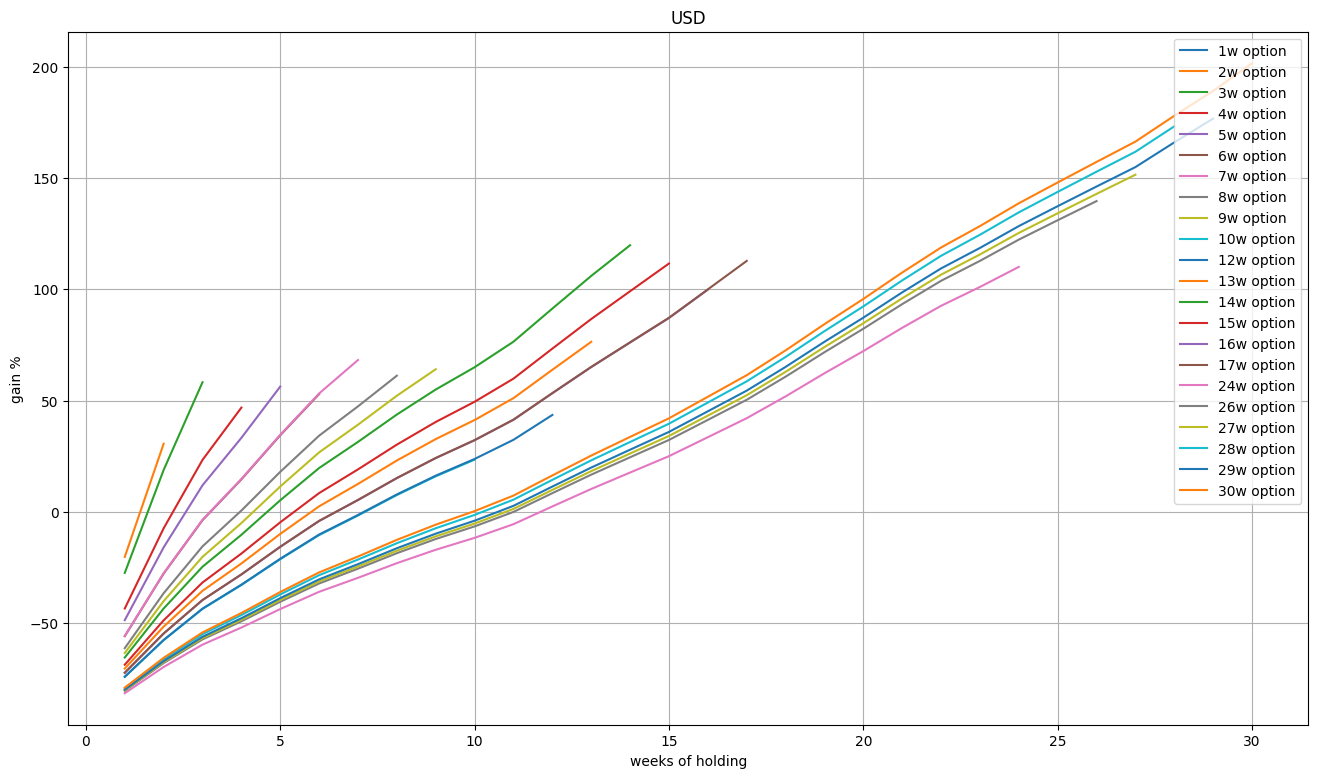

In [26]:
plt.figure(figsize=(16,9))

for w in option_leverage:
    lvr = option_leverage[w]
    gains = [None]
    for weeks in range(1, w+1):
        stock_changes = history['Close'].pct_change(periods=weeks) * 100
        option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
        mean_profit = option_profits.mean() #* 52 / weeks # annualized
        gains.append(mean_profit if mean_profit > -100 else None)
    plt.plot(gains, label=f'{w}w option')
        
plt.legend(loc='upper right')
plt.title(tickerSymbol)
plt.xlabel('weeks of holding')
plt.ylabel('gain %')
plt.grid()
plt.show()